Обычно, перед тем как вы получаете данные всегда должна предшествовать задача. Т.е. что заказчик хочет из этих данных извлечь что-то полезное. 

Например, что влияет на доход? количество клиентов? величину среднего чека (средняя сумма денег на каждую покупку)? какой товар самый продаваемый? какие есть сопутствующие товары? 

Поэтому глядя на данные важно понять, с чем мы имеем дело, какого типа эти данные? Хорошо, если являетесь специалистом в этой области. Это необходимо для того, чтобы правильно интерпретировать те результаты, которые будут.

Рассмотрим задачу с прокатом велобайков в одном из городов. 

Возможно, заказчику может быть интересны ответы на следующие вопросы: 

- в какие дни лучше всего готовить больше велосипедов, когда меньше? 
- от чего зависит количество прокатов и доход в этот день?
- в какие сезоны стоит нанимать больше персонала?

Все эти вопросы позволяют заказчику уменьшить риски лишних затрат и увеличить доход, сделать клиентов более счастливыми.

# Описание данных
## Источник

Данные взяты из [Bike Sharing Dataset Data Set](https://archive.ics.uci.edu/ml/datasets/Bike%20Sharing%20Dataset) и немного выправлены.

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal

Original Source: http://capitalbikeshare.com/system-data

Weather Information: http://www.freemeteo.com

Holiday Schedule: http://dchr.dc.gov/page/holiday-schedule

## Столбцы

Описание данных, которые есть, могут отличаться от описания ниже:

- season : сезон (1:зима, 2:весна, 3:лето, 4:осень)
- yr : год (0: 2011, 1:2012)
- mnth : месяц ( 1 to 12)
- holiday : является ли этот день выходным днём или нет (extracted from [Web Link](http://dchr.dc.gov/page/holiday-schedule))
- weekday : день недели
- workingday : является ли день рабочим или нет (выходной - 1, иначе 0).
+ weathersit :
    - 1: Ясно, немного облаков, частично облаков, в целом хорошо
    - 2: Переменная облачность, Туман + Облачность, Туман + разбитые облака, туман + несколько облаков, туман
    - 3: Легкий снег, легкий дождь + гроза + рассеянные облака, легкий дождь + рассеянные облака
    - ~  4: Дождь + Гроза + Дождь + Туман, Снег + Туман
- temp : Нормализованная температура в градусах Цельсия. Значения выводятся через (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Нормализованная температура по ощущениям в градусах Цельсия. Значения выводятся через (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Нормализованная влажность воздуха. Значения делятся на 100 (max)
- windspeed: Нормализованная скорость ветра. Значения делятся на 67 (max)
- windspeed(mph): скорость ветра в км/ч
- windspeed(ms): - windspeed(mph): скорость ветра в м/с
- cnt: кол-во всего проката велосипедов, включая как случайные, так и зарегистрированные

# Основная работа

Подключаем библы:

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Читаем данные и смотрим общее описание столбцов и их содержимого:

In [2]:
df = pd.read_csv('data/bikes_rent.csv')
df.shape

(731, 13)

In [3]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)',
       'cnt'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
season            731 non-null int64
yr                731 non-null int64
mnth              731 non-null int64
holiday           731 non-null int64
weekday           731 non-null int64
workingday        731 non-null int64
weathersit        731 non-null int64
temp              731 non-null float64
atemp             731 non-null float64
hum               731 non-null float64
windspeed(mph)    731 non-null float64
windspeed(ms)     731 non-null float64
cnt               731 non-null int64
dtypes: float64(5), int64(8)
memory usage: 74.3 KB


In [5]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,5.705220,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,2.321125,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,0.670650,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,4.041864,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,5.420351,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872077,30.430100,73.020850,15.625371,6.984967,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,15.198937,8714.000000


In [6]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [7]:
df['id'] = df.index  # добавляем номер (id) дня

## <font color="#373"> Ответьте на вопросы
    
1. Промежуток в сколько лет, месяцев составляют данные? (сколько лет, месяцев в данных?)
2. Есть ли в данных пропуски (в какой-то день недели записи отсутствуют)?
3. Наибольшее, среднее, минимальное количество арендованных велосипедов?
4. Какие значения может принимать характеристики `workingday`, `weekday`, `mth`, `hum`?

# Рисунки

Рисунки нужны для того, чтобы лучше понять те данные, с которыми будем дальше работать. Давайте посмотрим на те столбцы, с которыми будем работать.

## Смотрим на данные

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


Wall time: 25.5 s


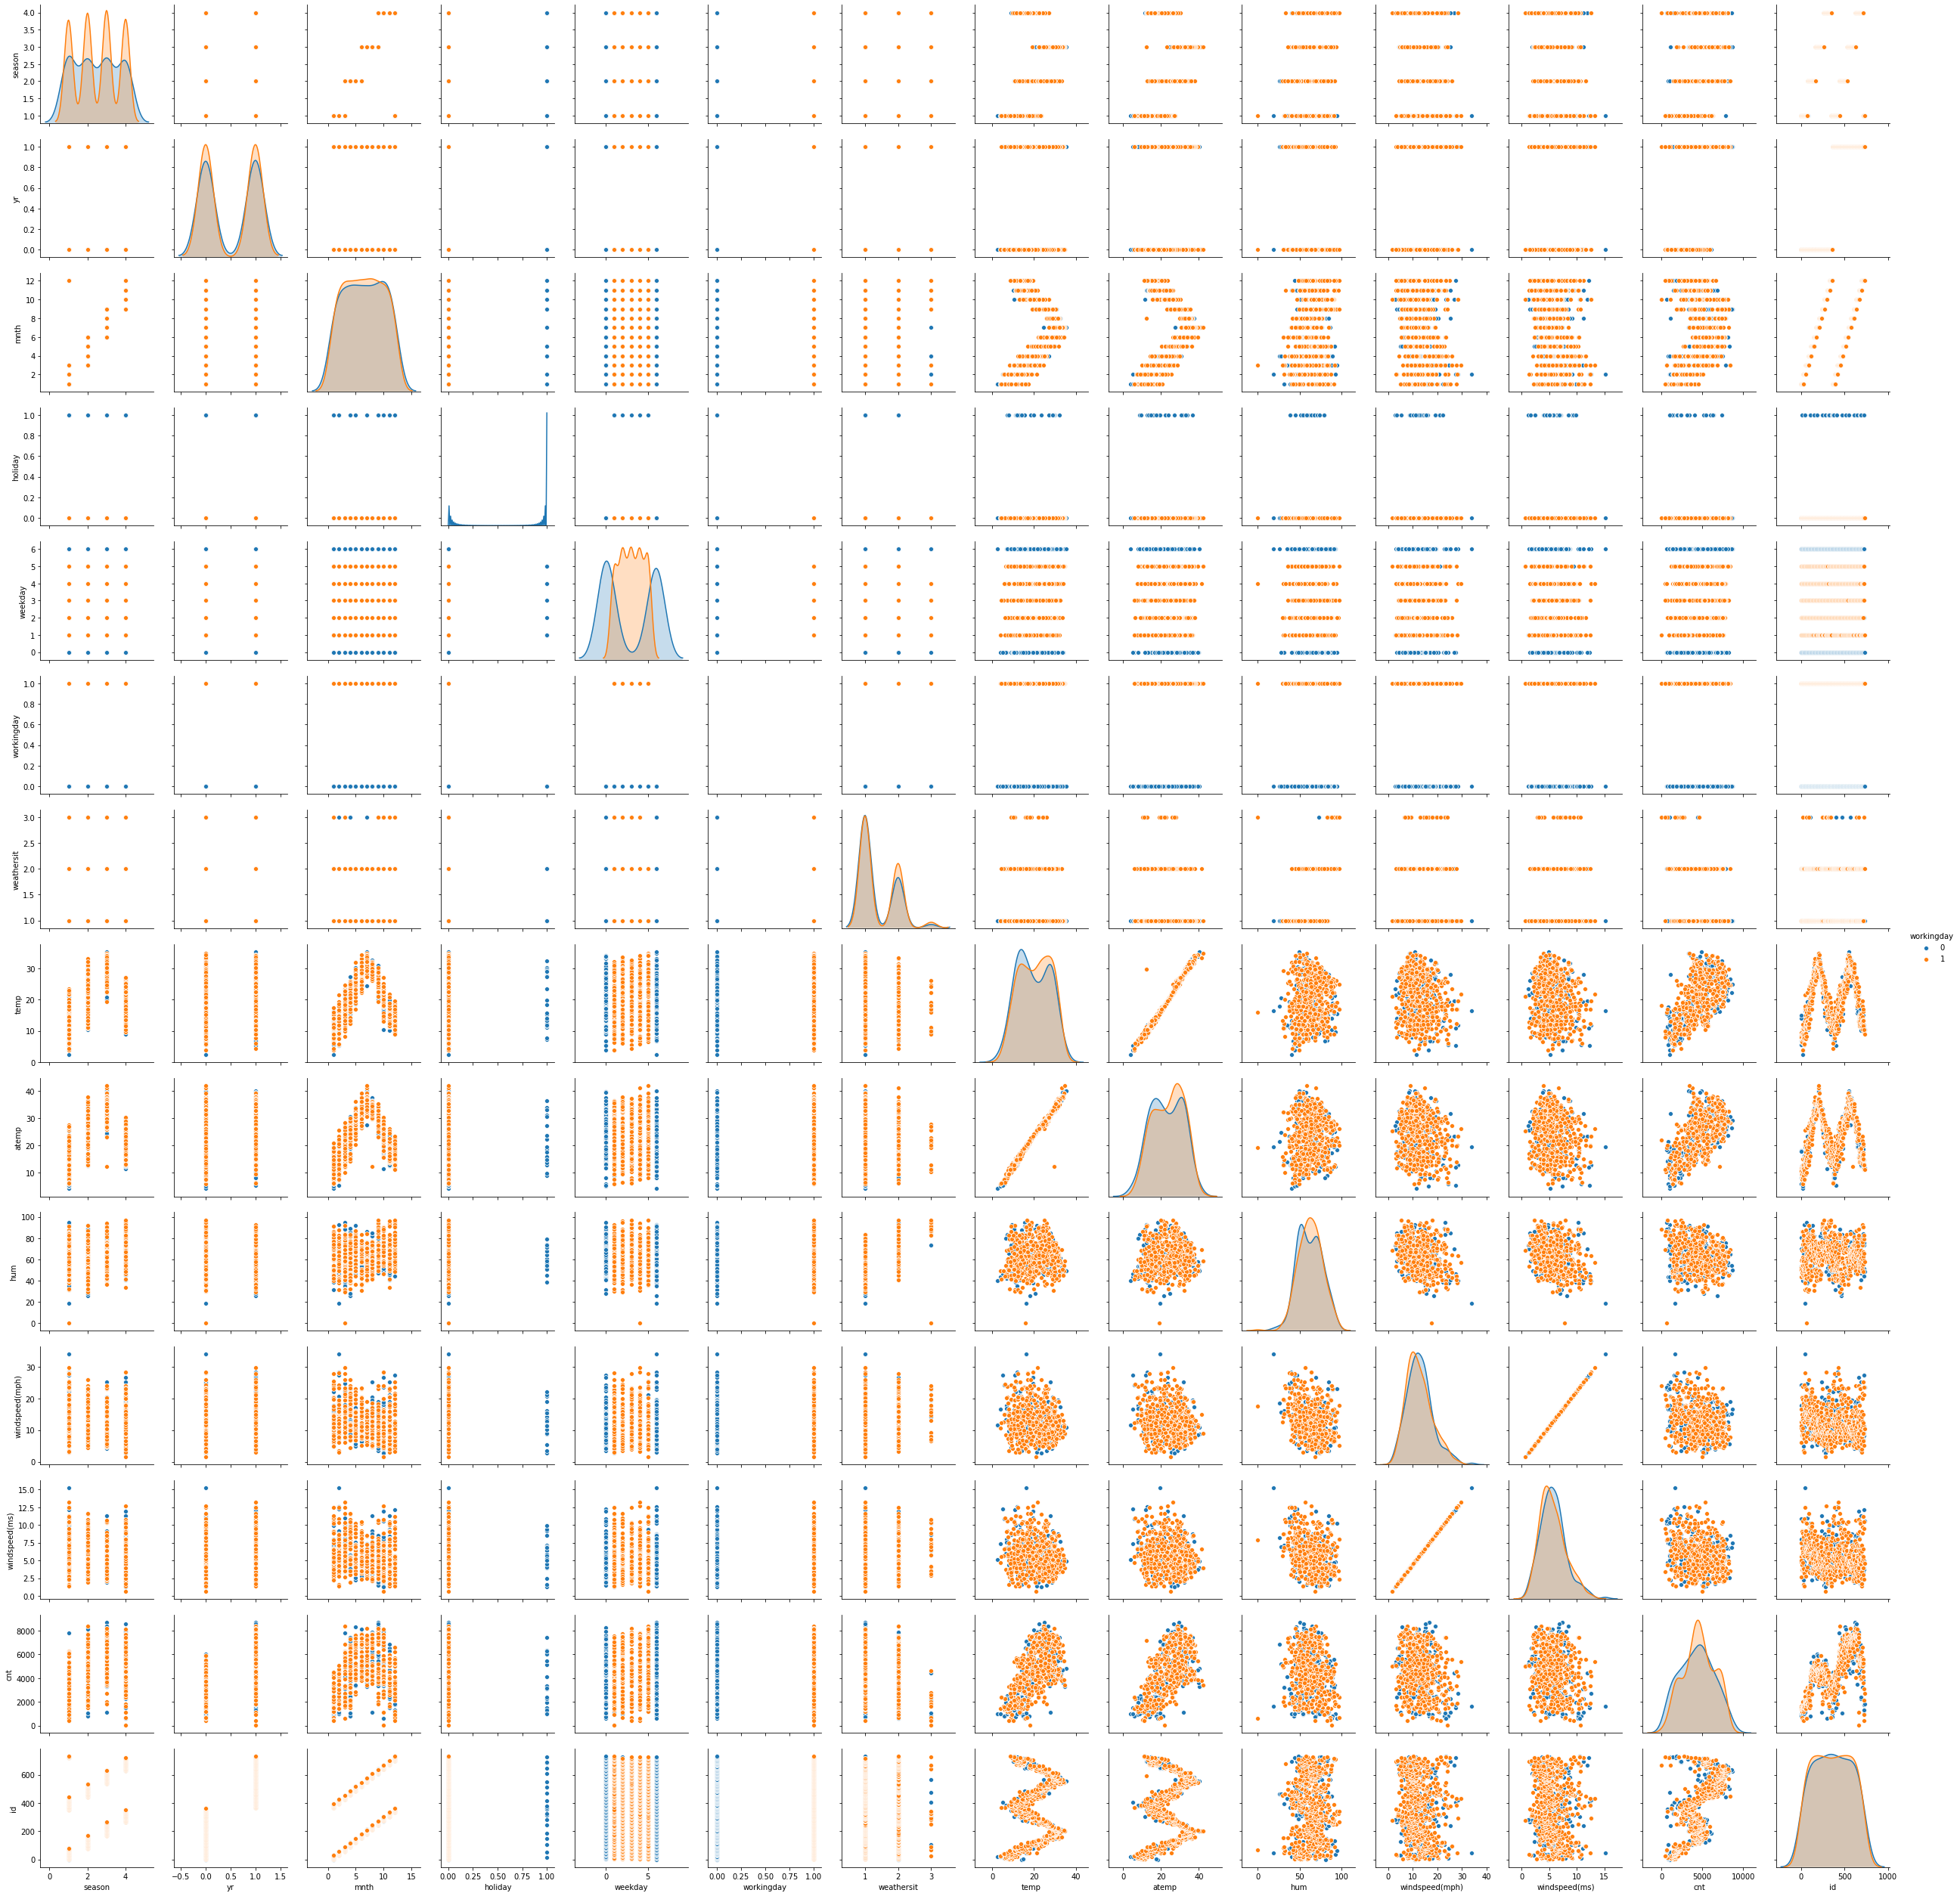

In [20]:
%%time
# эта функция может долго выполняться
sns.pairplot(df, hue='workingday')

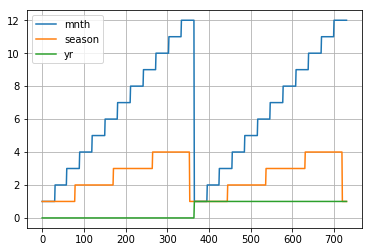

In [8]:
plt.plot(df['id'], df['mnth'])
plt.plot(df['id'], df['season'])
plt.plot(df['id'], df['yr'])
plt.grid()
plt.legend(['mnth', 'season', 'yr'])

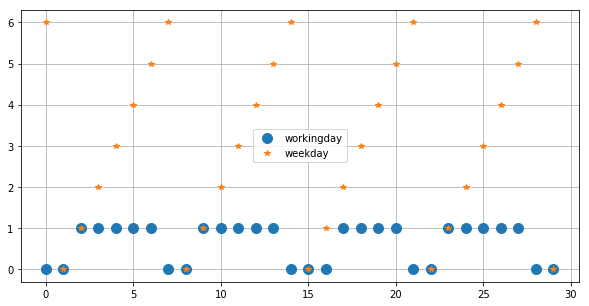

In [9]:
plt.figure(figsize=(10,5))
plt.plot(df['id'][:30], df['workingday'][:30], 'o', markersize=10)
plt.plot(df['id'][:30], df['weekday'][:30], '*')
plt.grid()
plt.legend()

In [10]:
df['weathersit'].unique()

array([2, 1, 3])

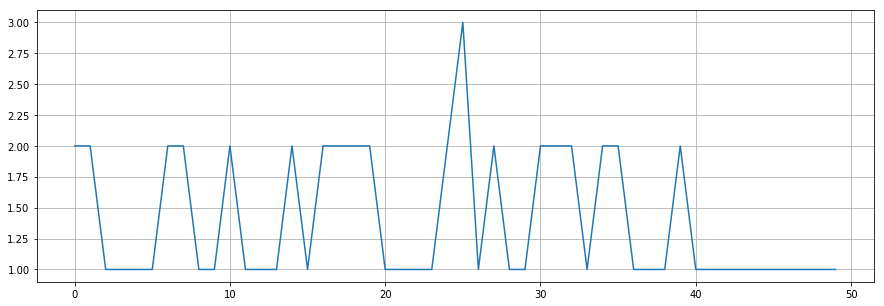

In [11]:
plt.figure(figsize=(15,5))
plt.plot(df['id'][:50], df['weathersit'][:50])
plt.grid()

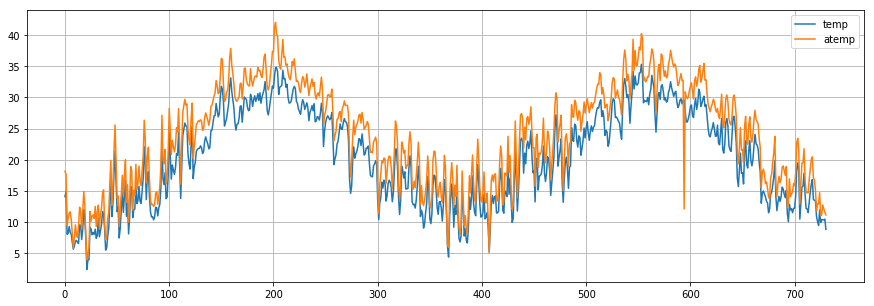

In [12]:
plt.figure(figsize=(15,5))
plt.plot(df['id'], df['temp'])
plt.plot(df['id'], df['atemp'])
plt.grid()
plt.legend(['temp','atemp'])

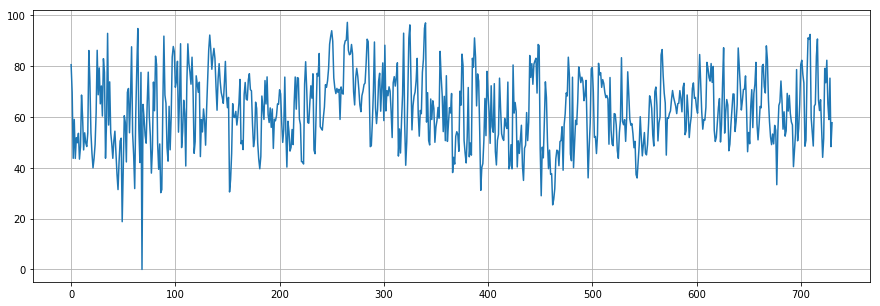

In [13]:
plt.figure(figsize=(15,5))
plt.plot(df['id'], df['hum'])
plt.grid()

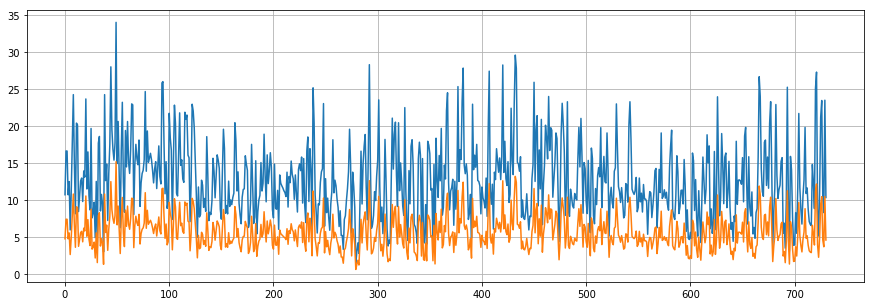

In [14]:
plt.figure(figsize=(15,5))
plt.plot(df['id'], df['windspeed(mph)'])
plt.plot(df['id'], df['windspeed(ms)'])
plt.grid()

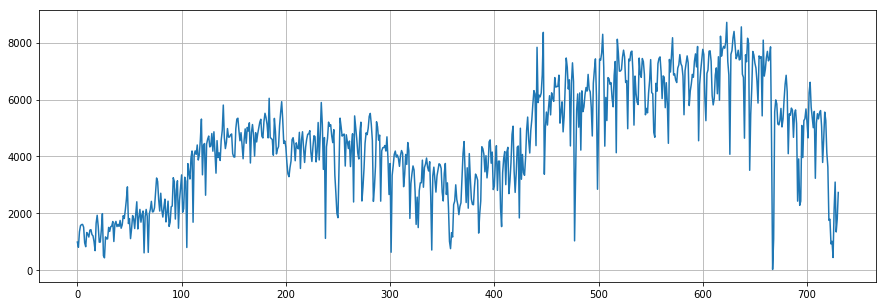

In [15]:
plt.figure(figsize=(15,5))
plt.plot(df['id'], df['cnt'])
plt.grid()

Таким образом, глядя на данные - можно понять примерную их структуру и что в них хранится.

## Извлекаем что-нибудь полезное

Из описания признаков можно сделать вывод, что их можно разбить на две группы: одни характеризуют время (день недели, месяц, сезон, год и т.д.), а другие погодные условия.

Попробуем посмотреть на эти данные с двух этих сторон.

## Влияние дня

Сгруппируем количество по дням и посмотрим:

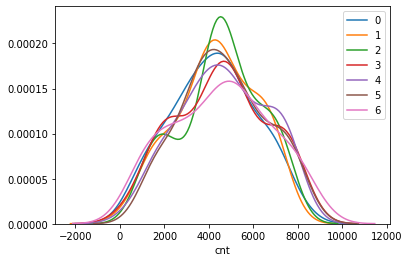

In [60]:
gr = df.groupby('weekday')  # группировка по дням недели

for key, group in gr:
    sns.distplot(group['cnt'], label=key, hist=False)
plt.legend()

Кажется от дня недели не сильно что-то зависит. Посмотрим дни недели для разных месяцев и сезонов:

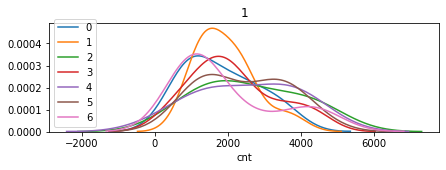

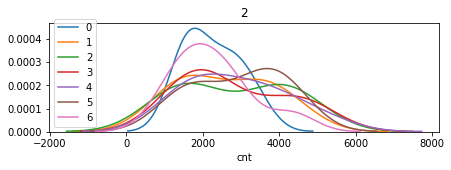

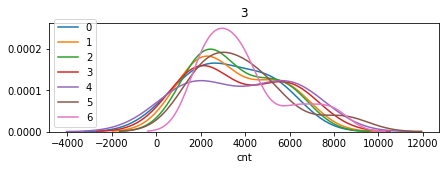

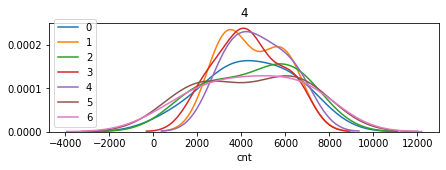

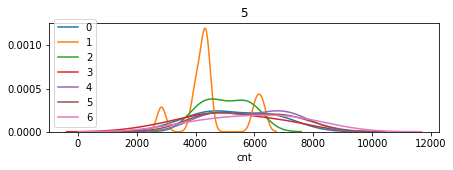

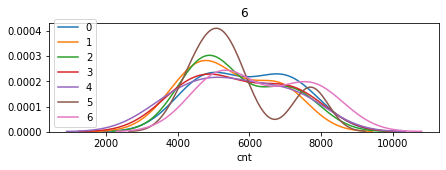

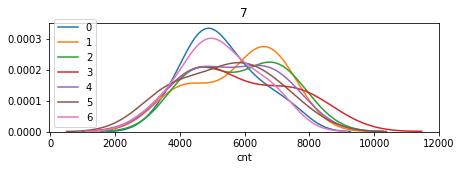

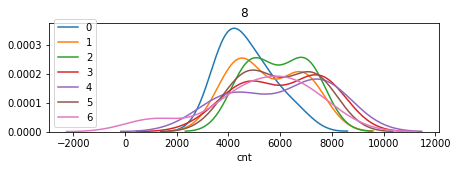

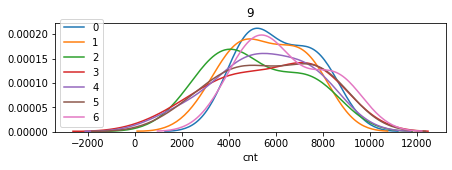

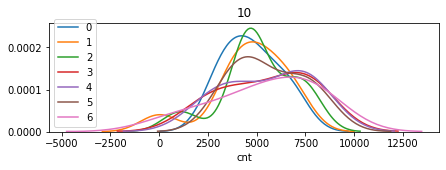

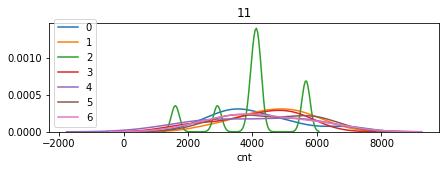

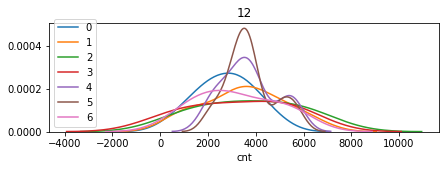

In [75]:
gr_mnth = df.groupby('mnth')  # группировка по дня недели
for key, group in gr_mnth:
    gr = group.groupby('weekday')  # группировка по дням недели
    
    plt.figure(figsize=(7,2))
    plt.title(key)
    for key, group in gr:
        sns.distplot(group['cnt'], label=key, hist=False)
    plt.legend()


Вот так уже что-то интереснее - можно делать какие-то выводы.

Попробуйте самостоятельно нарисовать распределения в зависимости от того, является день рабочим или выходным.

In [17]:
dr = df.groupby('workingday')
dr



,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt,id
workingday,,,,,,,,,,,,,
0,231,231,231,231,231,231,231,231,231,231,231,231,231
1,500,500,500,500,500,500,500,500,500,500,500,500,500


## Влияние погоды

Странно, что день недели не влияет